## Predicting Diabetes with Machine Learning 

This analysis aims to develop a classification model for diabetes by examining various health factors, including age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. 

By understanding the relationships between these factors and diabetes risk, we can improve disease prediction, early detection, and ultimately, patient outcomes.


### Understanding the dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Domain Knowledge 


> 1.Pregnancies = Number of times pregnant.  Pregnancy, particularly when complicated by gestational diabetes, can raise the chances of developing type 2 diabetes.

> 2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test. Elevated blood glucose, especially when fasting or after meals, signals impaired glucose regulation and a higher risk of diabetes.

> 3.BloodPressure = Diastolic blood pressure (mm Hg). High blood pressure often coexists with diabetes, with each condition increasing the risk of the other, and both negatively affecting cardiovascular health.

> 4.SkinThickness = Triceps skin fold thickness (mm)

> 5.Insulin = 2-Hour serum insulin (mu U/ml). High insulin levels can signal insulin resistance, while low insulin levels can indicate insulin deficiency, both of which are key factors in the development and management of diabete

> 6.BMI = Body mass index (weight in kg/(height in m)^2). Higher BMI, especially excess fat around the waist, raises the likelihood of type 2 diabetes by contributing to insulin resistance.

> 7.DiabetesPedigreeFunction = Diabetes pedigree function. A higher Diabetes Pedigree Function score suggests a stronger genetic predisposition, meaning the individual is more likely to develop diabetes due to their family history.

> 8.Age = Age (years). As people age, their risk of developing diabetes increases due to factors like reduced physical activity, hormonal changes, and a higher chance of other health conditions.


> 9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0







In [44]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#For pre-processing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#For modelling and model evaluation 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

#Model improvement 
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

### Exploratory data analysis (EDA)

1) Handle duplicates, missing values and data description

2) Understanding the distribution of various features (Univariate analysis)

3) Understand the relationships between features and the target variable (Bivariate analysis)

4) Correlation 


In [3]:
data = pd.read_csv('diabetes_dataset.csv', sep=',')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Handle duplicates 

duplicates_rows = data[data.duplicated()]

print(duplicates_rows.shape)

(0, 9)


In [6]:
# Double checking null values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Distribution of features - Univariate analysis 

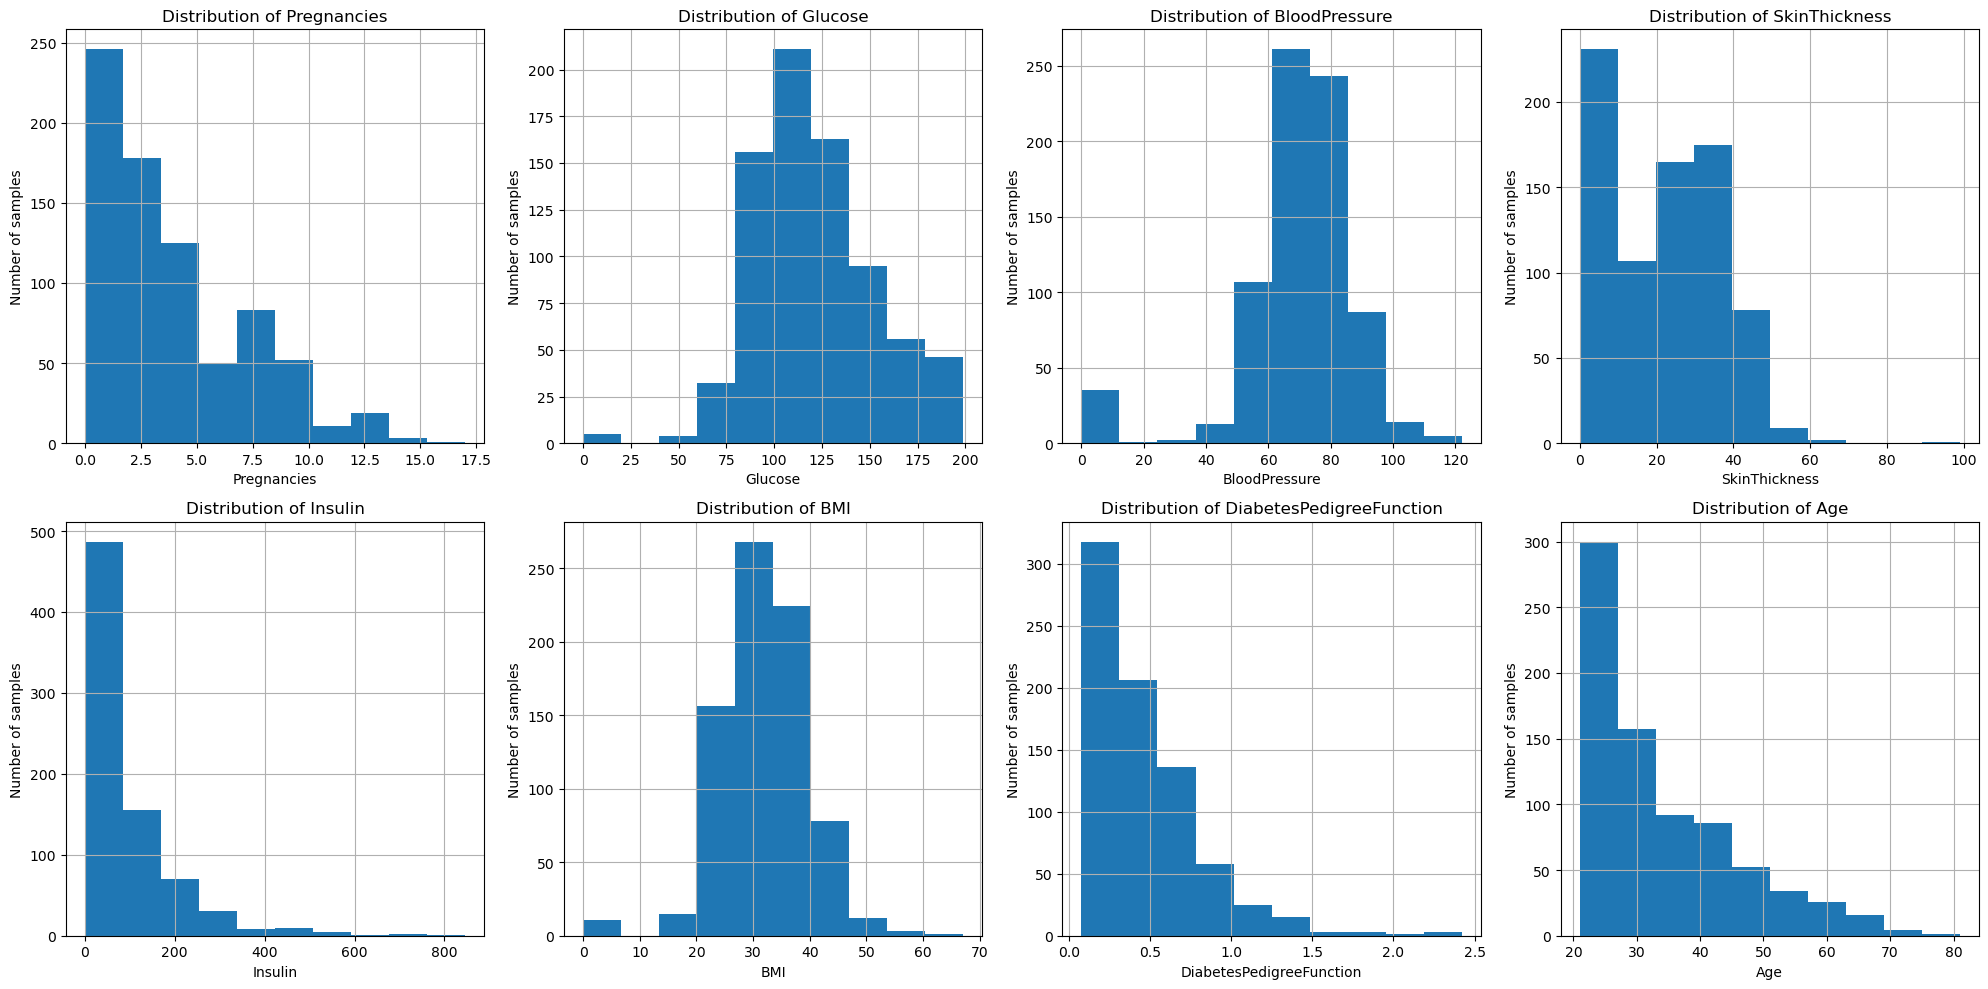

In [8]:
#Distribution of features 

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10)) #creates a figure and a grid of subplots 

# Flatten the axes array for easy iteration
axes = axes.flatten() 

# Plot distribution of each feature
for i, feature in enumerate(features):  #enumerate provides both the index i and the value for feature.  This is necessary because we need to specify which subplot to use (axes[i]) for each feature's histogram.
    data[feature].hist(bins=10, ax=axes[i])
    axes[i].set_xlabel(feature) #axes = subplot
    axes[i].set_ylabel('Number of samples')
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


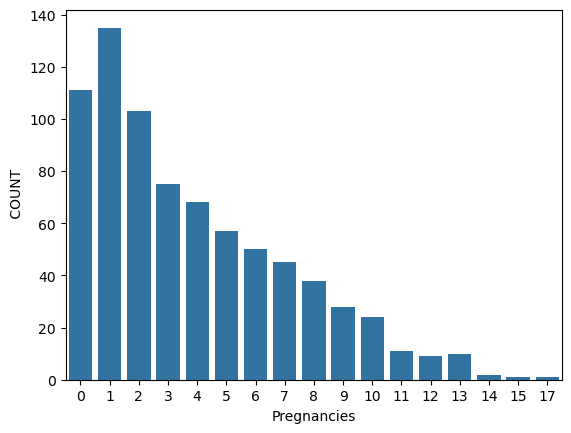

In [9]:
sns.barplot(x= data['Pregnancies'].value_counts().index, y = data['Pregnancies'].value_counts().values)
plt.xlabel('Pregnancies')
plt.ylabel(" COUNT")
plt.show()

BMI, BloodPressure and  Glucose are normally distributed

More younger people in the study than older people 

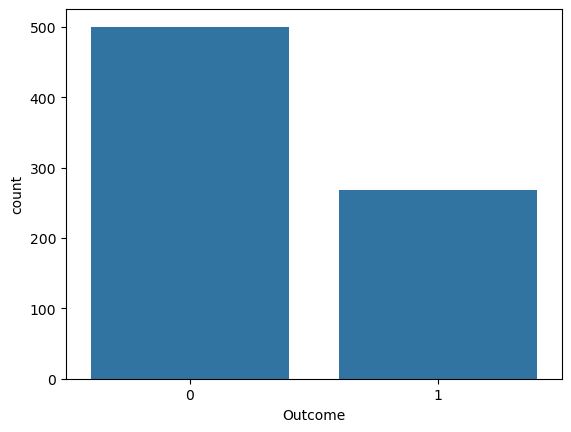

Outcome
0          65.104167
1          34.895833
dtype: float64


In [10]:
#Distribution of target variable 

target_df =data[['Outcome']]

sns.countplot(x='Outcome', data=target_df)
plt.show()


#Display percentages 
print(data[['Outcome']].value_counts(normalize=True)*100)

Data is not balanced. We have more of the healthy data than diabetic data

### Bivariate Aalysis 

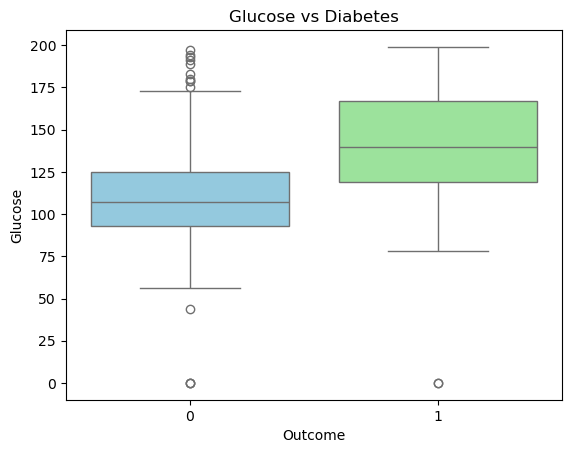

In [11]:
# Boxplot BMI vs Glucose  

sns.boxplot(x='Outcome', y='Glucose', data= data, palette={'0': 'skyblue', '1': 'lightgreen'})
plt.title('Glucose vs Diabetes')
plt.show()

Median glucose of  diabetic people higher than that of non-diabetic ones.

This potentially suggests a correlation between higher glucose level and diabetes.

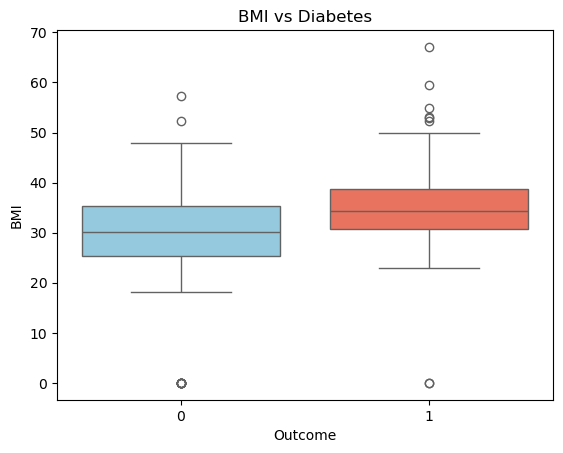

In [12]:
# Boxplot BMI vs Diabetes 

sns.boxplot(x='Outcome', y='BMI', data= data, palette={'0': 'skyblue', '1': 'tomato'})
plt.title('BMI vs Diabetes')
plt.show()

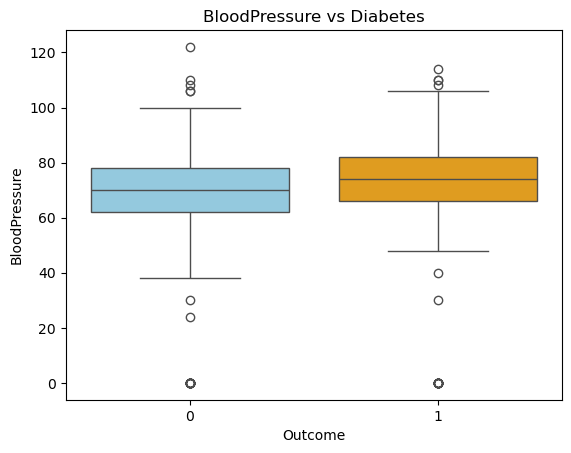

In [13]:
sns.boxplot(x='Outcome', y='BloodPressure', data= data, palette={'0': 'skyblue', '1': 'orange'})
plt.title('BloodPressure vs Diabetes')
plt.show()

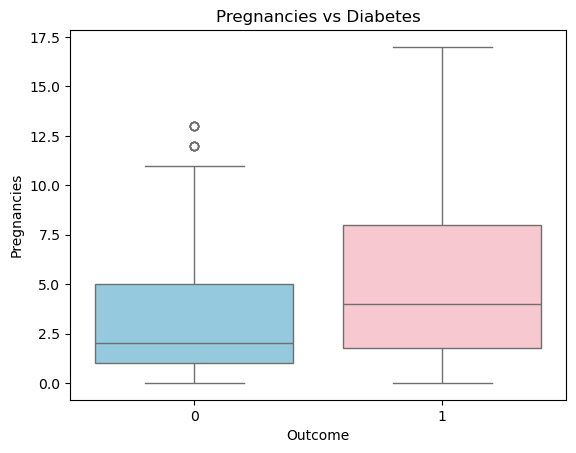

In [14]:
sns.boxplot(x='Outcome', y='Pregnancies', data= data, palette={'0': 'skyblue', '1': 'pink'})
plt.title('Pregnancies vs Diabetes')
plt.show()

### Correlation between features 

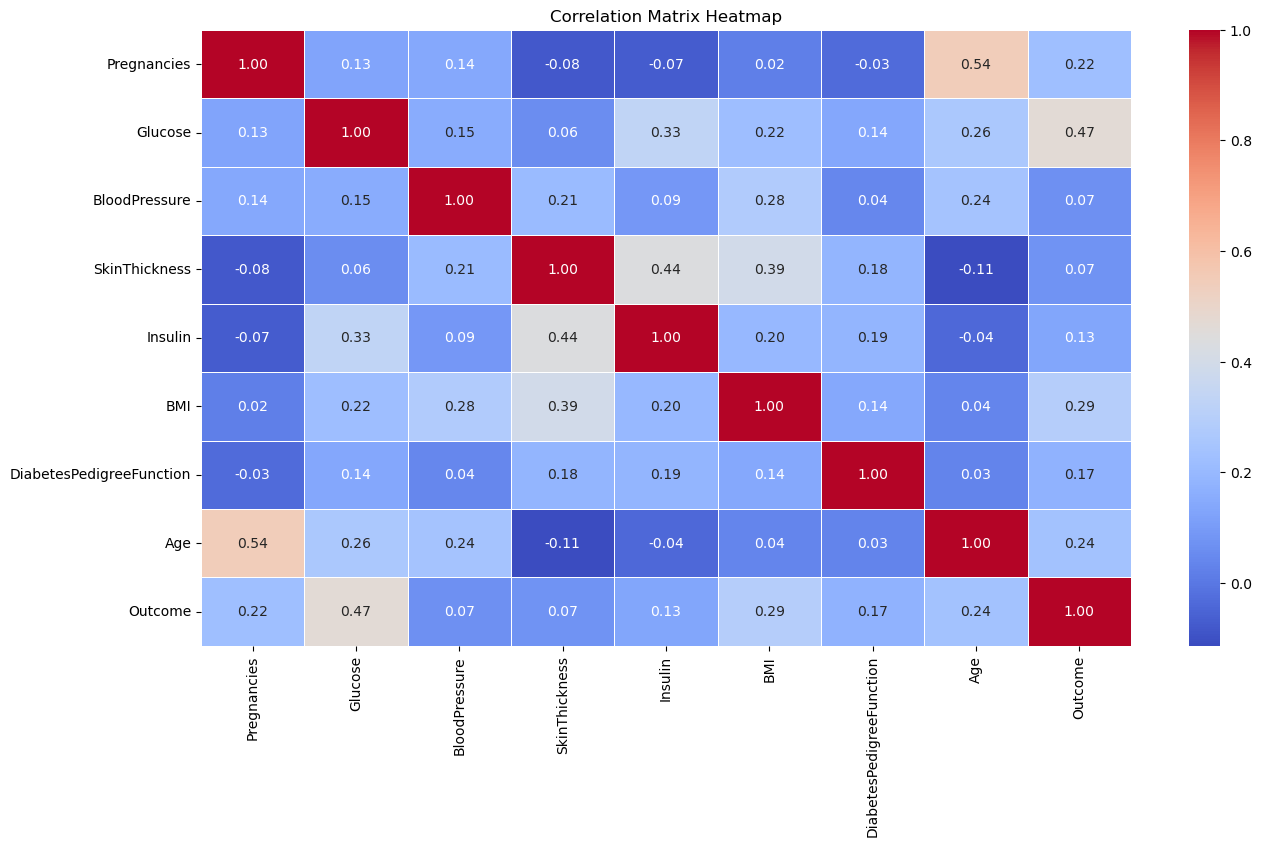

In [15]:
# Compute the correlation matrix
correlation_matrix = data.corr()

#Graph I.
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

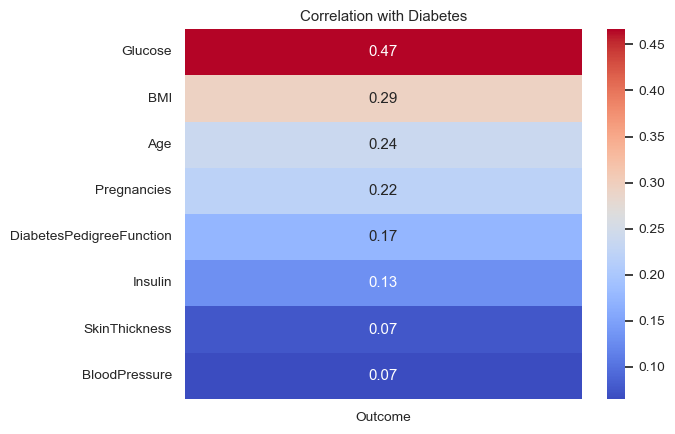

In [16]:
#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.9)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Strong positive correlation between diabetes and glucose, BMI and Age. 


### Predictive Analysis 

Data is not balanced. More rows with 0 as target compared to 1. It's essential to balance the data to ensure that the model doesn't get biased towards the majority class 

For this, Synthetic Minority Over-sampling Technique (SMOTE)- generates synthetic samples for the minority class and undersampling with RandomUnderSampler will be used. 

In [17]:
X = data.drop(columns='Outcome')

y = data['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(y_train.value_counts())


0    401
1    213
Name: Outcome, dtype: int64


### Balancing the data 

In [20]:
#Sythetic data generation for minority class 

smote = SMOTE(sampling_strategy=1.0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [21]:
print(y_train_over.value_counts())

0    401
1    401
Name: Outcome, dtype: int64


In [22]:
#Removing some rows from the majority class

under_sampler = RandomUnderSampler(sampling_strategy=1.0)

X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [23]:
print(y_train_under.value_counts())

0    213
1    213
Name: Outcome, dtype: int64


In [24]:
X_train.shape

(614, 8)

In [25]:
X_train_under.shape

(426, 8)

### Scaling the data 

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
X_train_over_scaled = scaler.fit_transform(X_train_over)

In [28]:
X_train_under_scaled = scaler.fit_transform(X_train_under)

### Support vector machine 

In [29]:
def svc (X_train, y_train, X_test, y_test):
    #Train SVM classifier 
    svm_clf = SVC()
    svm_clf.fit(X_train, y_train)

    #Do predictions
    y_pred = svm_clf.predict(X_test)

    #Access performance 
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

In [30]:
accuracy_normal, f1_normal = svc(X_train_scaled, y_train, X_test_scaled, y_test)
accuracy_under, f1_under = svc(X_train_under_scaled, y_train_under, X_test_scaled, y_test)
accuracy_over, f1_over = svc(X_train_over_scaled, y_train_over, X_test_scaled, y_test)


In [31]:
# Print results
print(f"SVM Accuracy (Normal): {accuracy_normal}, F1 Score (Normal): {f1_normal}")
print(f"SVM Accuracy (Under): {accuracy_under}, F1 Score (Under): {f1_under}")
print(f"SVM Accuracy (Over): {accuracy_over}, F1 Score (Over): {f1_over}")

SVM Accuracy (Normal): 0.7337662337662337, F1 Score (Normal): 0.6019417475728155
SVM Accuracy (Under): 0.6753246753246753, F1 Score (Under): 0.6428571428571428
SVM Accuracy (Over): 0.6883116883116883, F1 Score (Over): 0.625


Oversampling or undersampling is not improving the model, this is probabaly because of the small dataset we are using

For other models, we will only be using the normal data

### Random Forest

In [32]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
# Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                               param_grid=rf_param_grid, 
                               scoring='accuracy', 
                               cv=5, 
                               verbose=2, 
                               n_jobs=-1)

In [ ]:
rf_grid_search.fit(X_train_scaled, y_train)


In [35]:
# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.7883379981340796


In [36]:
# Predict with the best models

best_rf_model = rf_grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf}")

Random Forest Test Accuracy: 0.7597402597402597


In [37]:
report_rf= classification_report(y_test, y_pred_rf)

print(report_rf)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



### XGBoost

In [46]:
from xgboost import XGBClassifier

In [47]:
# Hyperparameter grid for XGBoost
xg_param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [48]:
# XGBoost
xg_grid_search = GridSearchCV(estimator=XGBClassifier(), 
                               param_grid=xg_param_grid, 
                               scoring='accuracy', 
                               cv=5, 
                               verbose=2, 
                               n_jobs=-1)

In [54]:
# Fit XGBoost Grid Search
xg_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [55]:
# Best parameters and score for XGBoost
print("Best parameters for XGBoost:", xg_grid_search.best_params_)
print("Best cross-validation score for XGBoost:", xg_grid_search.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best cross-validation score for XGBoost: 0.7915500466480074


In [56]:
best_xg_model = xg_grid_search.best_estimator_

y_pred_xg = best_xg_model.predict(X_test_scaled)

accuracy_xg = accuracy_score(y_test, y_pred_xg)

print(f"XGBoost Test Accuracy: {accuracy_xg}")

XGBoost Test Accuracy: 0.7597402597402597


In [57]:
report_xg= classification_report(y_test, y_pred_xg)

print(report_xg)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



 ### Model evaluation and interpretation

XGBoost is the best performing model, with F1 score of 76%

F1 score is the best metrix to use here because we need a balance between precision and recall and there is an uneven class distribution 


Our trained  achieved an accuracy of around 76%. This indicates that the model correctly classified around 76% of all cases in the test set.

Looking deeper into the classification metrics, let's dissect the performance for each class (0 and 1) separately:

#### Class 0 (Non-diabetes):

- The model has a high precision (0.82) for class 0, meaning that among all instances where the model predicted non-diabetes, 82% were indeed non-diabetes

- The recall for class 0 is also high (0.81). This means that our model correctly identified 81% of all actual non-diabetes cases in the dataset. 

#### Class 1 (Diabetes): 

- The precision for class 1 is lower around (0.66), which indicates that when the model predicted diabetes, it was correct around 66% of the time. 

- The recall is also low around (0.67). This means that our model was able to capture around 67% of all actual diabetes cases. 

The F1 score, a harmonic mean of precision and recall, is around 0.81 for class 0 and around 0.67 for class 1. The weighted average F1 score is around 0.76, in line with the overall accuracy.

This discrepancy in performance between classes is likely due to the imbalance in the original dataset. Class 0 (Non-diabetes) is the majority class and has more examples for the model to learn from.

    
In summary, while our model performs okay overall, it particularly excels with the majority class (non-diabetes). 

To enhance performance on the minority class (diabetes), we can further address class imbalance, use a bigger dataset  or adjust model parameters.

Subsequent iterations and refinements are needed to enhance precision and recall in diabetes predictions

#### Feature Importance 

Identify and discuss the top features that contribute most to predicting diabetes

In [59]:
# Assuming you have the original DataFrame 'data' with features
features = data.drop(columns='Outcome').columns  # Get original feature names

# Retrieve feature importances
importances = best_xg_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importances_df = pd.DataFrame(importances, index=features, columns=['Importance'])

# Sort the features by importance in descending order
top_features = feature_importances_df.sort_values('Importance', ascending=False).head(4)

print("Top 4 features contributing to diabetes:")
print(top_features)


Top 4 features contributing to diabetes:
             Importance
Glucose        0.281101
BMI            0.174015
Age            0.155427
Pregnancies    0.090496


The feature importance results provide insight into which features are most influential in predicting diabetes using our XGBoost model

 Overall, our findings do align well with medical knowledge and literature about risk factors for diabetes. The most important features are `blood-related` measurements, followed by `age` and `BMI`. 